to connect to the database, you need to open up a tunnel from the command line, e.g.: 

```$ ssh -fNL 27017:localhost:27017 chris@stanfordmemorylab.com```

and then enter your password

if you don't already have the mongo database-related password information locally 

```$  scp -r chris@stanfordmemorylab.com:/home/chris/face_experiment/credentials/ local/path/to/save/credentials```

In [25]:
import pickle, pandas, os, json, pymongo, numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from datetime import datetime
from PIL import Image

In [26]:
%matplotlib inline

In [27]:
# def establish_mongo_connection(location, keyname, mongo_database, mongo_collection): 
#     """
#     connect to database. Requires a connection to server was established via terminal, e.g.
#     $ ssh -fNL 27017:localhost:27017 tyler@stanfordmemorylab.com
#     """
#     # load information from credentials
#     access_info = json.load(open(location + keyname))
#     # set up the 'tunnel' we'll be using to access the server
#     mongo_tunnel = 'mongodb://' + access_info['user'] + ':' + access_info['pwd'] + '@127.0.0.1'
#     # conect to the mongo client on the server
#     connection = pymongo.MongoClient(mongo_tunnel)
#     # connect to the database
#     data_base = connection[mongo_database]
#     # connect to the collection
#     collection = data_base[mongo_collection]
    
#     return collection

In [28]:
os.getcwd()

'/Users/chrisiyer/_Current/thesis_folder/face_experiment/results/scripts/memory-related-bias-main'

In [29]:
save_path = '/Users/chrisiyer/_Current/thesis_folder/face_experiment/results/data/main/'
# credential location -- this a copy of the credentials folder on the server
location = '../../../credentials/'
# aws key name 
aws_rootkey = 'aws_keys.json'
# mongo key name
keyname = 'mongo_keys'

In [30]:
access_info = json.load(open(location + keyname))
# set up the 'tunnel' we'll be using to access the server
mongo_tunnel = 'mongodb://' + access_info['user'] + ':' + access_info['pwd'] + '@127.0.0.1'
# conect to the mongo client on the server
connection = pymongo.MongoClient(mongo_tunnel)

In [31]:
## name of mongo database to look through
mongo_database = "chris"
## name of mongo collection
mongo_collection = "main_task_2" # NEW!
## 
# load information from credentials
access_info = json.load(open(location + keyname))
# set up the 'tunnel' we'll be using to access the server
mongo_tunnel = 'mongodb://' + access_info['user'] + ':' + access_info['pwd'] + '@127.0.0.1'
# conect to the mongo client on the server
connection = pymongo.MongoClient(mongo_tunnel)
# connect to the database
data_base = connection[mongo_database]
# connect to the collection
collection = data_base[mongo_collection]

In [43]:
delete_collection_documents = 0
for i_collection_name in data_base.list_collection_names(): 
    i_collection = data_base[i_collection_name]
    print('collection name', i_collection_name, 'has %d documents'%len( [i for i in i_collection.find({})]))

collection name main_task_2 has 15076 documents
collection name main_task has 21806 documents
collection name test has 9 documents
collection name classification_task has 19 documents
collection name face_experiment has 4354 documents


In [46]:
# takes a while to load everything from the server
all_trials = [i for i in collection.find({})]
df = pandas.DataFrame({})

for i_trial in all_trials:
    df = df.append( {i: i_trial[i] for i in i_trial}, ignore_index=True) 

In [47]:
df.iteration.unique()

array(['pilot_sona_afc2', 'pilot_testing', 'prolific_afc',
       'prolific_afc3'], dtype=object)

In [54]:
iteration = 'prolific_afc3'
save_df = df[df.iteration == iteration]

In [56]:
save_data = 1 # CHANGE THIS TO TOGGLE DATA SAVING

if save_data: 
    mongo_info = '%s_%s_%s_%s.csv'%(mongo_database, mongo_collection, iteration, datetime.today().strftime("%d_%m_%Y"))
    save_df.to_csv(save_path + 'taskdata_%s'%mongo_info)
    
#     summary_df.to_csv('summarydata_%s.csv'%mongo_info)
#     trial_df.to_csv('trialdata_%s.csv'%mongo_info) 

---END OF SAVING DATA---
Now, want to extract PID + bonuses for bonusing participants

In [67]:
dem_file = 'prolific_afc3_white.csv'#iteration + '.csv' # CHANGE THIS
df_dem = pandas.read_csv(save_path + 'demographics/' + dem_file)
ids_awaiting = df_dem.loc[df_dem.status == 'AWAITING REVIEW'].participant_id.values
df_awaiting = df.loc[(df.trial_type == 'summary') &(df.subject_id.isin(ids_awaiting)),
                     ['subject_id', 'total_bonus']]

In [68]:
out = ''
for i in range(len(df_awaiting)):
    if (float(df_awaiting.iloc[i]['total_bonus']) > 0): 
        out += df_awaiting.iloc[i]['subject_id'] + ', ' + df_awaiting.iloc[i]['total_bonus'] + '\n'

# copy paste into prolific
print(out)

6018360036a61b046a344369, 1.16
6104271b0eca200c3a28011f, 0.39
627f448165ed9095fd43cfd1, 1.04
5eb2220339aaed38706d2ed5, 0.41
5d58471ffe8768001a31d33a, 0.62
61bb38a940db417c1a138cd1, 0.96
6103a8f4f20ce4e0873a7b22, 0.41
61602d371599d54a4e61545c, 0.01
5dde8961a4aa26f2f73d785b, 0.63
6202986aef1cb18a1337c2b1, 1.18
5e641e41de78961a95ffc6f8, 1.14
600b867e297f072364af7a99, 0.50
5c7db851461e90001c7a06ce, 1.13
61523eecd52ec29c4c08d938, 0.95
628795edea38f8a3b2ee9e60, 0.93
5fe3f539dd8cf10e7d545231, 0.46
627b0d689d780840df214aee, 0.18
60fdd466763872a6e5135b7c, 0.33
5fa19ff29675d12de2935107, 0.75
56ec151f388e1d000a5924d0, 0.22
616c7777b6a2486957bafbf0, 0.63
5fb9de27e62120924c5b2176, 0.52
61108c68c7aa8101bf6ad5bf, 1.17
5fabf9bfaa84e00ccd8961a2, 0.40
604dff87be5115f1266d3963, 0.61
5e35a96ecf931055fb891c54, 0.30
615e0ebf1d8fec3d10018efa, 0.94
5da49efa203c590013533d84, 0.56
61501967e49a3d7e1977e4b4, 0.32
559385f5fdf99b78e49c58e9, 0.78
5f07a7464989193e97240278, 0.33
610c736500a4b33398fef94f, 0.25
5f4efbf9

Now, we want to summarize performance at each step

In [34]:
# just get desired iterations
df_summary = df[(df.iteration == iteration) & (df.trial_type == 'summary')][
    'subject_id', 'encoding_accuracy', 'encoding_avg_rt', 
                      'filler_accuracy', 'filler_avg_rt', 'retrieval_accuracy', 
                      'retrieval_avg_rt', 'total_bonus'
    
]
df_summary = df.loc[[,
                     []]
df_summary

SyntaxError: invalid syntax (<ipython-input-34-5b9ee35064bc>, line 3)

In [33]:
[i for i in df_summary.filler_accuracy]

[100.0,
 85.0,
 75.0,
 95.0,
 95.0,
 90.0,
 100.0,
 100.0,
 85.0,
 95.0,
 100.0,
 100.0,
 90.0,
 95.0,
 90.0,
 80.0,
 90.0,
 90.0,
 95.0,
 85.0,
 80.0,
 100.0,
 95.0,
 86.0,
 80.0,
 85.0,
 95.0,
 80.0,
 90.0,
 95.0,
 95.0,
 85.0,
 100.0,
 90.0,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 95,
 85,
 95,
 95,
 90,
 85,
 95,
 100,
 75,
 100,
 95,
 90,
 95,
 100,
 95,
 95,
 100,
 90,
 86,
 91,
 80,
 86,
 100,
 95,
 95,
 85,
 62,
 90,
 100,
 90,
 95,
 100,
 95,
 100,
 100,
 95,
 95,
 80,
 95,
 100,
 95,
 95,
 91,
 87,
 85,
 95,
 68,
 86,
 90,
 100,
 100,
 100,
 65,
 100,
 81,
 95,
 100,
 86,
 90,
 90,
 100,
 90,
 95,
 95,
 90,
 80,
 81,
 90,
 60,
 90,
 90,
 85,
 95,
 80,
 95,
 85,
 100,
 90,
 100,
 95,
 100,
 95,
 81,
 80,
 86,
 82,
 86,
 100,
 100,
 95,
 90,
 86,
 95,
 80,
 95,
 100,
 90,
 100,
 85,
 70,
 90,
 100,
 95,
 95,
 95,
 71,
 83,
 100,
 85,
 95,
 90,
 95]

Plot accuracies for the 3 tasks

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

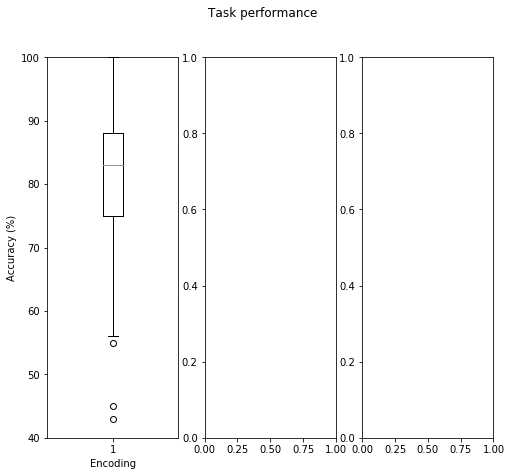

In [28]:
lims = (40,100)

# ENCODING
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,7))
fig.suptitle('Task performance')
ax1.boxplot(df_summary.encoding_accuracy)
ax1.set_xlabel('Encoding')
ax1.set_ylabel('Accuracy (%)')
#ax1.set_ylim(lims)

ax2.boxplot(df_summary.filler_accuracy)
ax2.set_xlabel('Filler')
#ax2.set_ylim(lims)

ax3.boxplot(df_summary.retrieval_accuracy)
ax3.set_xlabel('Retrieval')
#ax3.set_ylim(lims)

plt.show()